In [1]:
#3, 4, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 27
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'NationalNames.csv'

df = pd.read_csv(file_path)

In [2]:
print(df.columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [3]:
print(df.describe())

                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


In [4]:
print(df['Name'].nunique())

93889


In [5]:
most_popular_name_by_year = df.groupby('Year').apply(lambda x: x.loc[x['Count'].idxmax()])
overall_most_popular_name_data = most_popular_name_by_year.loc[most_popular_name_by_year['Count'].idxmax()]
print("The name is '", overall_most_popular_name_data['Name'], "' in", overall_most_popular_name_data.name)

The name is ' Linda ' in 1947


In [6]:
min_count = df['Count'].min()
min_count_records_count = (df['Count'] == min_count).sum()
print(min_count_records_count)

254615


In [20]:
unique_names_by_year = df.groupby('Year')['Name'].nunique()
year_with_most_unique_names = unique_names_by_year.idxmax()
count_of_unique_names = unique_names_by_year.max()
result_df = pd.DataFrame({'Year': [year_with_most_unique_names], 'Name': [count_of_unique_names]})
print(result_df)

2008
   Year   Name
0  2008  32488


In [21]:
data_for_most_unique_names_year = df[df['Year'] == 2008]
most_popular_name_in_year_with_most_unique_names = data_for_most_unique_names_year.loc[data_for_most_unique_names_year['Count'].idxmax(), 'Name']
print("'" + most_popular_name_in_year_with_most_unique_names + "'")

'Jacob'


In [9]:
female_jacob_data = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
female_jacob_count_by_year = female_jacob_data.groupby('Year')['Count'].sum()
year_with_most_female_jacob = female_jacob_count_by_year.idxmax()
print(df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F') & (df['Year'] == year_with_most_female_jacob)])

              Id   Name  Year Gender  Count
1455556  1455557  Jacob  2004      F    171


In [10]:
gender_neutral_names_by_year = df.groupby('Year').apply(lambda x: len(set(x[x['Gender'] == 'M']['Name']).intersection(set(x[x['Gender'] == 'F']['Name']))))
result_df = pd.DataFrame({'Year': gender_neutral_names_by_year.index,'Count': gender_neutral_names_by_year.values})
year_with_most_gender_neutral_names = result_df.loc[result_df['Count'].idxmax()]
print(year_with_most_gender_neutral_names)

Year     2008
Count    2557
Name: 128, dtype: int64


In [11]:
children_by_year = df.groupby('Year')['Count'].sum()
year_with_most_children = children_by_year.idxmax()
print(year_with_most_children)

1957


In [12]:
children_by_year_and_gender = df.groupby(['Year', 'Gender'])['Count'].sum()
print(children_by_year_and_gender)

Year  Gender
1880  F           90993
      M          110491
1881  F           91954
      M          100745
1882  F          107850
                 ...   
2012  M         1889414
2013  F         1745339
      M         1881463
2014  F         1768775
      M         1901376
Name: Count, Length: 270, dtype: int64


In [13]:
children_by_year_and_gender = df.groupby(['Year', 'Gender'])['Count'].sum()
girls_by_year = children_by_year_and_gender[:, 'F']
boys_by_year = children_by_year_and_gender[:, 'M']
years_more_girls = (girls_by_year > boys_by_year).sum()
print(years_more_girls)

54


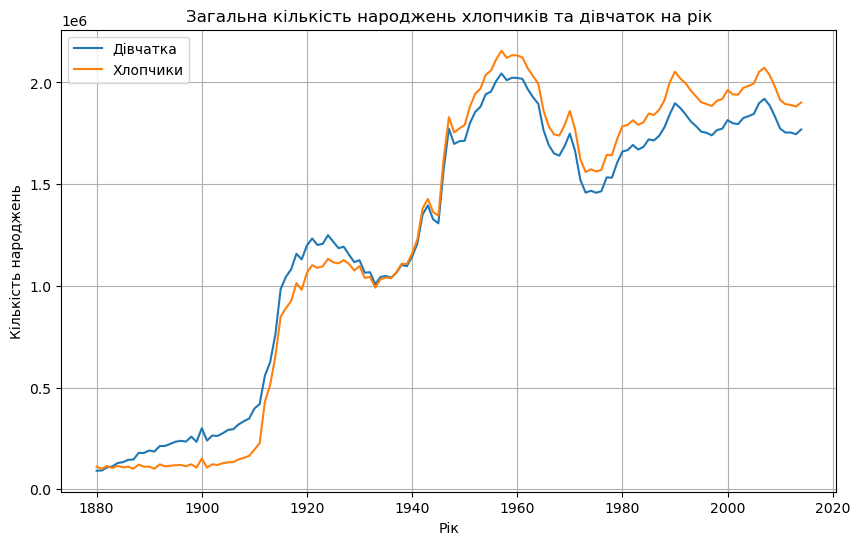

In [14]:
children_by_year_and_gender = df.groupby(['Year', 'Gender'])['Count'].sum()
girls_by_year = children_by_year_and_gender[:, 'F']
boys_by_year = children_by_year_and_gender[:, 'M']
data = pd.DataFrame({
    'Дівчатка': girls_by_year.values,
    'Хлопчики': boys_by_year.values
}, index=girls_by_year.index)
data.plot(kind='line', figsize=(10, 6))
plt.title('Загальна кількість народжень хлопчиків та дівчаток на рік')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.grid(True)
plt.show()

In [15]:
children_by_name_and_gender = df.groupby(['Name', 'Gender'])['Count'].sum()
girls_by_name = children_by_name_and_gender[:, 'F']
boys_by_name = children_by_name_and_gender[:, 'M']
neutral_names = girls_by_name.index.intersection(boys_by_name.index)
count_of_neutral_names = len(neutral_names)
print(count_of_neutral_names)

10221


In [16]:
min_year = df['Year'].min()
max_year = df['Year'].max()
years_observed = max_year - min_year + 1
print("Спостереження проводились "+ str(years_observed) +" років")

Спостереження проводились 135 років


In [17]:
grouped = df.groupby('Name')
gender_neutral = grouped.filter(lambda x: x['Gender'].nunique() == 2)
gender_neutral = gender_neutral.groupby('Name').filter(lambda x: len(x) == 270)
gender_neutral_names = gender_neutral['Name'].unique()
print("Gender-neutral names that occur in every year of observation:")
print(gender_neutral_names)

Gender-neutral names that occur in every year of observation:
['Jessie' 'Ollie' 'Marion' 'Jean' 'Francis' 'John' 'William' 'Lee' 'James'
 'Sidney' 'Robert' 'Joseph' 'Tommie' 'Johnnie' 'Leslie' 'Jesse']


In [18]:
grouped = df.groupby('Year')
def get_least_popular_names(group):
    min_count = group['Count'].min()
    return group[group['Count'] == min_count]
least_popular_names = grouped.apply(get_least_popular_names)
least_popular_names.reset_index(drop=True, inplace=True)

name_counts = least_popular_names.groupby('Name')['Count'].sum()
most_popular_name = name_counts.idxmax()
most_popular_count = name_counts.max()
print("Найбільш популярне серед непопулярних імен - це " + most_popular_name + ". Їм називали " + str(most_popular_count) + " разів.")

Найбільш популярне серед непопулярних імен - це Celester. Їм називали 160 разів.


In [19]:
most_popular_names_by_year = df.loc[df.groupby('Year')['Count'].idxmax()]
print(most_popular_names_by_year[['Year', 'Name', 'Count']])

         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]
